### Imports

In [1]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

### Carregando o dataset

In [0]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino),(imagens_teste, identificacoes_teste)) = dataset.load_data()

### Explorar os dados

In [3]:
len(imagens_treino)
imagens_treino.shape
imagens_teste.shape
len(identificacoes_teste)
print(identificacoes_treino.min())
print(identificacoes_treino.max())

0
9


### Exibição dos dados

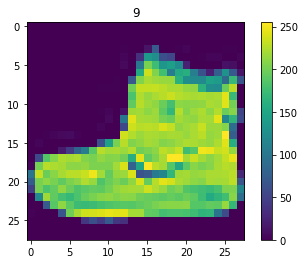

In [4]:
total_de_classificacoes = 10
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover',
                          'Vestido', 'Casaco', 'Sandália', 'Camisa',
                          'Tênis', 'Bolsa', 'Bota']

plt.imshow(imagens_treino[0])
plt.title(identificacoes_treino[0])
'''
#visualizar as primeiras imagens
for imagem in range(10):
    plt.subplot(2, 5, imagem+1)
    plt.imshow(imagens_treino[imagem])
    plt.title(nomes_de_classificacoes[identificacoes_treino[imagem]])
'''
plt.imshow(imagens_treino[0])
plt.colorbar()

Normalização - diminuindo o tamanho para o treino

In [0]:
imagens_treino = imagens_treino/float(255)

# Criando, compilando e treinando o modelo
Camadas (Layers)

In [5]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)), #Entrada
    keras.layers.Dense(256, activation=tensorflow.nn.relu), #processamento
    keras.layers.Dropout(0.2), #processamento
    keras.layers.Dense(10, activation=tensorflow.nn.softmax) #saida
])

modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics = ['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 5s 114us/sample - loss: 0.5273 - acc: 0.8140 - val_loss: 0.4220 - val_acc: 0.8468
Epoch 2/5
48000/48000 [==============================] - 5s 109us/sample - loss: 0.3985 - acc: 0.8562 - val_loss: 0.3691 - val_acc: 0.8686
Epoch 3/5
48000/48000 [==============================] - 5s 106us/sample - loss: 0.3612 - acc: 0.8680 - val_loss: 0.3745 - val_acc: 0.8642
Epoch 4/5
48000/48000 [==============================] - 5s 111us/sample - loss: 0.3409 - acc: 0.8745 - val_loss: 0.3468 - val_acc: 0.8751
Epoch 5/5
48000/48000 [==============================] - 6s 118us/sample - loss: 0.3246 - acc: 0.8814 - val_loss: 0.3334 - val_acc: 0.8763


# Salvando e Carregando o modelo

In [11]:
from tensorflow.keras.models import load_model

modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


# Visualizando as acurácias de treino e validação por época

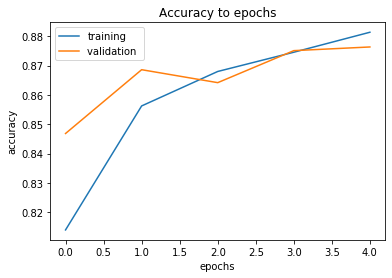

In [16]:
plt.plot(historico.history['acc'])
plt.plot(historico.history['val_acc'])
plt.title('Accuracy to epochs')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['training', 'validation '])

# Visualizando as perdas de treino e validação por época

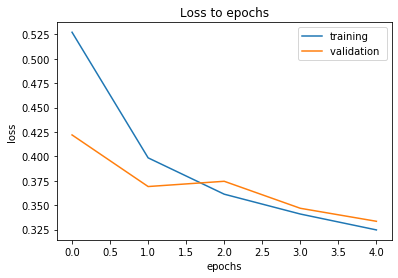

In [7]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Loss to epochs')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['training', 'validation '])

# Testando o modelo e o modelo salvo

In [14]:
testes = modelo.predict(imagens_teste)
print('Resultado teste: ',np.argmax(testes[1]))
print('Número da imagem de teste: ', identificacoes_teste[1])

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('Resultado testes modelo salvo: ', np.argmax(testes_modelo_salvo[1]))
print('Número da imagem de teste: ', identificacoes_teste[1])

Resultado teste:  2
Número da imagem de teste:  2
Resultado testes modelo salvo:  2
Número da imagem de teste:  2


# Avaliando o modelo

In [15]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste: ', perda_teste)
print('Acurácia do teste: ', acuracia_teste)

10000/10000 [==============================] - 0s 46us/sample - loss: 58.8524 - acc: 0.8478
Perda do teste:  58.85243299407959
Acurácia do teste:  0.8478
